Импортирование библиотек

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [8]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import KFold
import time

In [9]:
data = pd.read_csv('car_prices.csv')
data.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


Информация по датасету. Кол-во строк, столбцов

In [10]:
data.shape

(558837, 16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [12]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [13]:
data.describe(include=['O'])

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [14]:
data.body.value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

Заметим, что есть повторяющиеся значения в разных регистрах

In [15]:
data['body'] = data['body'].str.lower()
data['make'] = data['make'].str.lower()
data['model'] = data['model'].str.lower()
data['trim'] = data['trim'].str.lower()
data['transmission'] = data['transmission'].str.lower()
data['color'] = data['color'].str.lower()
data['state'] = data['state'].str.lower()
data['interior'] = data['interior'].str.lower()
data['seller'] = data['seller'].str.lower()

In [16]:
data.describe(include=['O'])

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,66,851,1888,46,3,550297,64,46,17,14263,3766
top,ford,altima,base,sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93997,19349,55842,241343,475915,22,82945,110970,244329,19693,5334


Выведем статистику уникальных значений и пропущенных

In [17]:
data.nunique()

year                34
make                66
model              851
trim              1888
body                46
transmission         3
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [18]:
data.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Визуализация

In [19]:
def custom_hist(training_set, xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [20]:
list_n_features = ['year',	'condition']

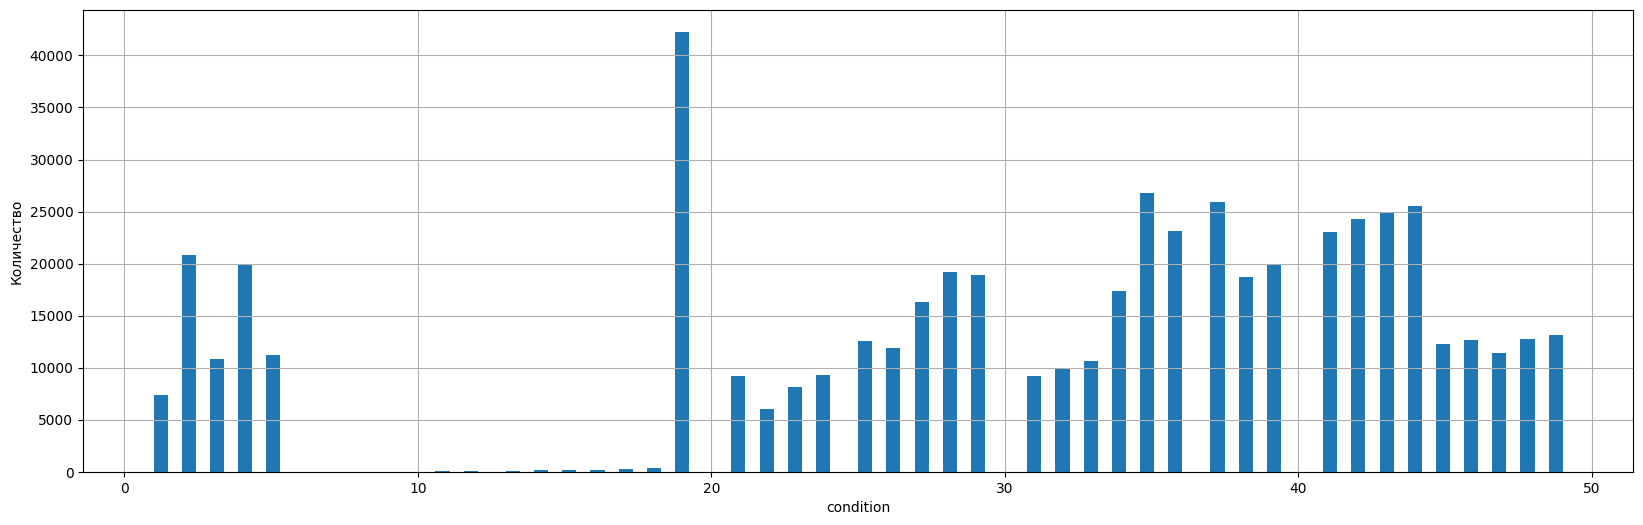

In [21]:
custom_hist(data['condition'], 'condition',  bins = 100)

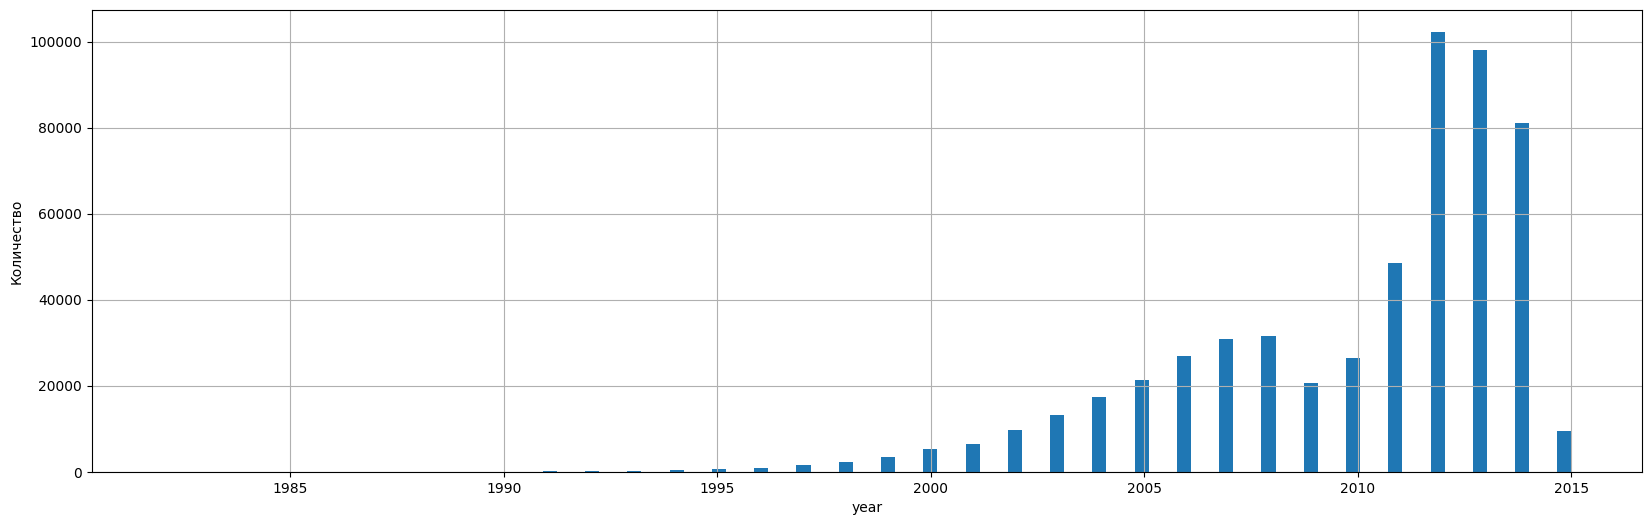

In [22]:
custom_hist(data['year'], 'year', bins = 100
            )

Упорядоченное распределение признаков

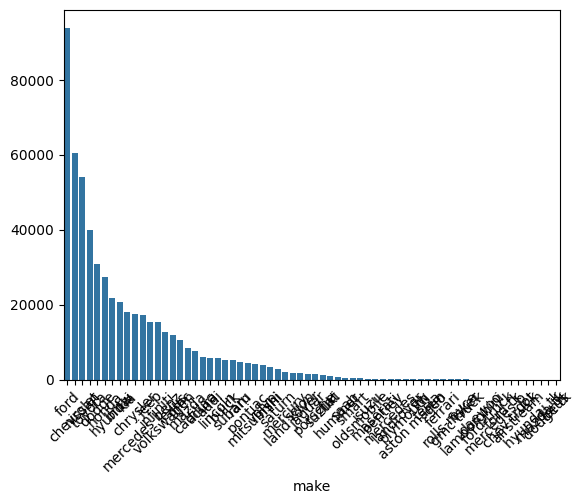

In [23]:
counts = data.make.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

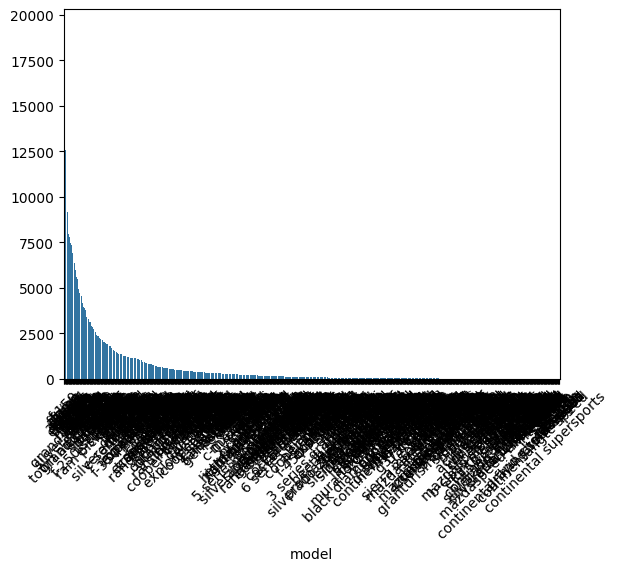

In [24]:
counts = data.model.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

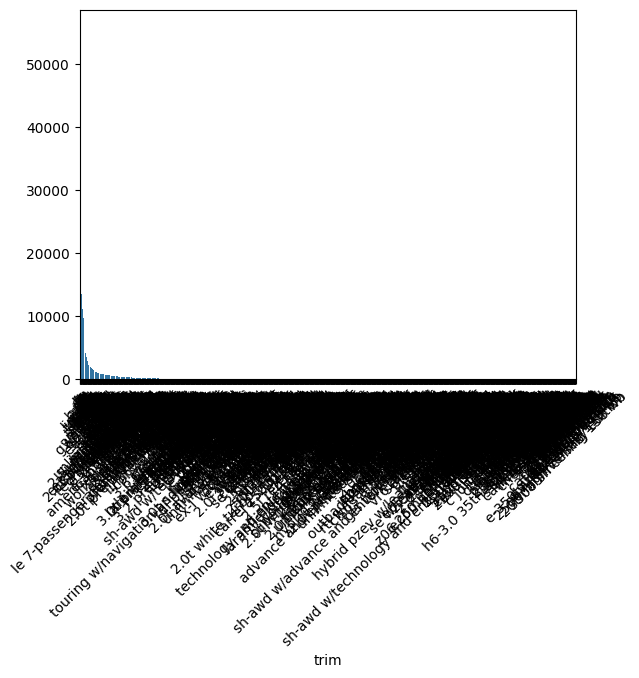

In [25]:
counts = data.trim.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Такая картина наблюдается ввиду наличия большого кол-ва уникальных значений

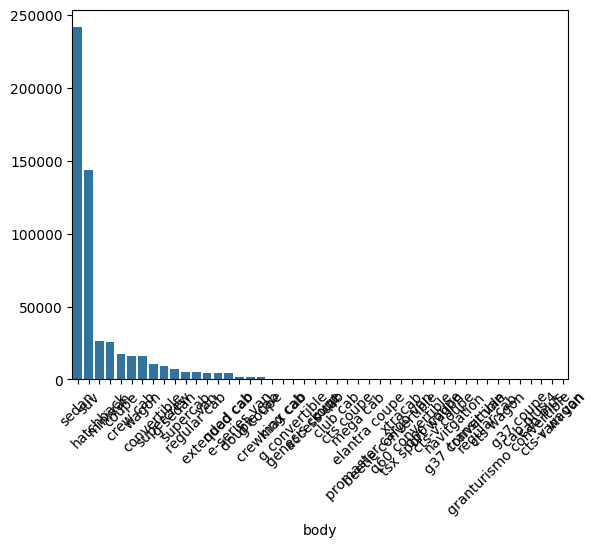

In [26]:
counts = data.body.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

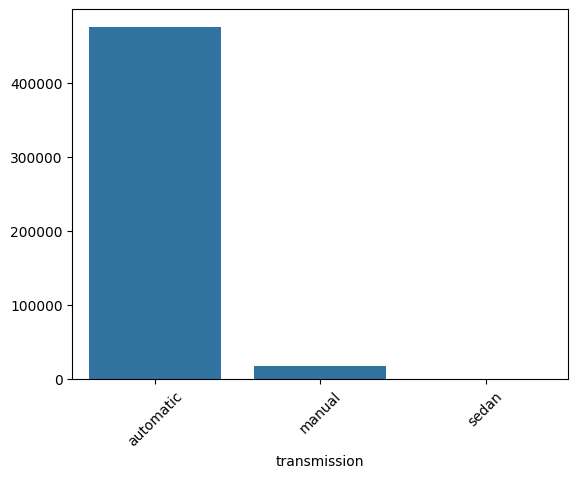

In [27]:
counts = data.transmission.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

In [28]:
data.transmission.value_counts()

transmission
automatic    475915
manual        17544
sedan            26
Name: count, dtype: int64

Ошибочно в трансмиссии находится значение, которое по смыслу не соответствует данному столбцу

In [29]:
data = data[data.transmission != 'sedan']

In [30]:
data.transmission.value_counts()

transmission
automatic    475915
manual        17544
Name: count, dtype: int64

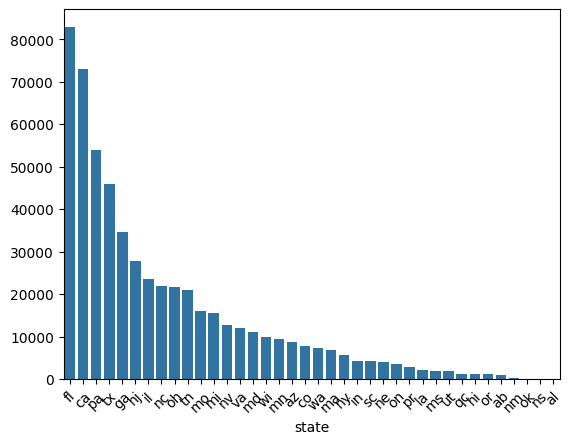

In [31]:
counts = data.state.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

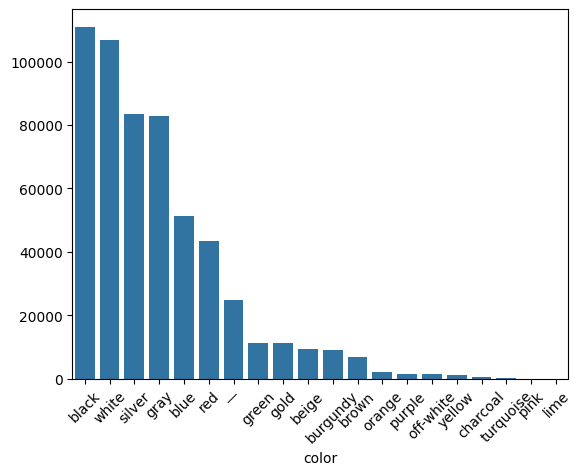

In [32]:
counts = data.color.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

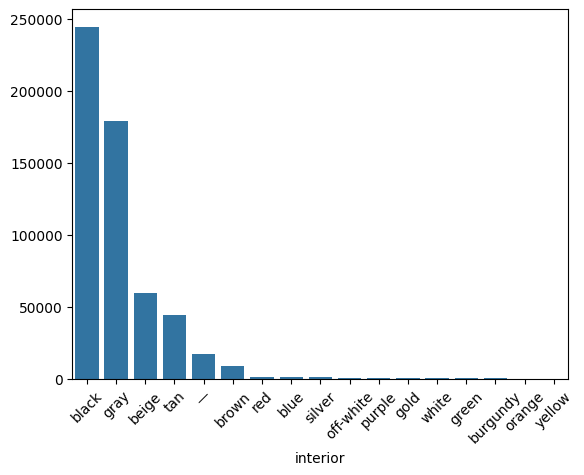

In [33]:
counts = data.interior.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Также выведем точечное распределение целевой переменной и некоторых признаков, чтобы оценить влияние признака на целеую переменную

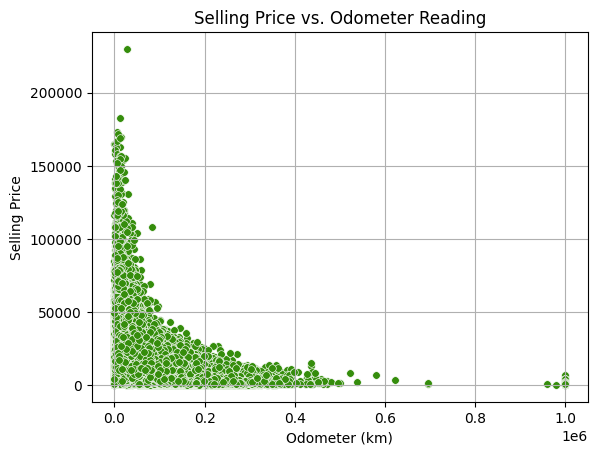

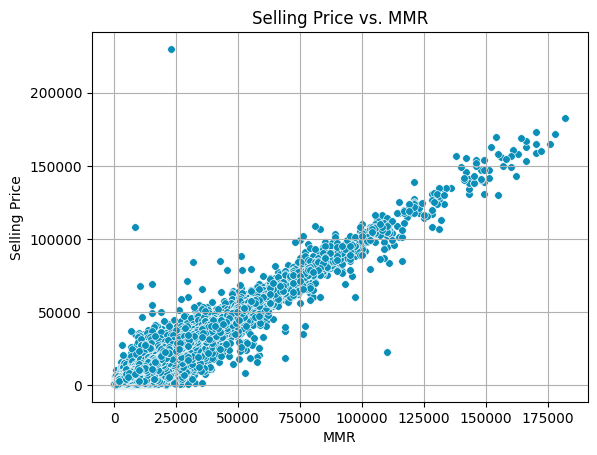

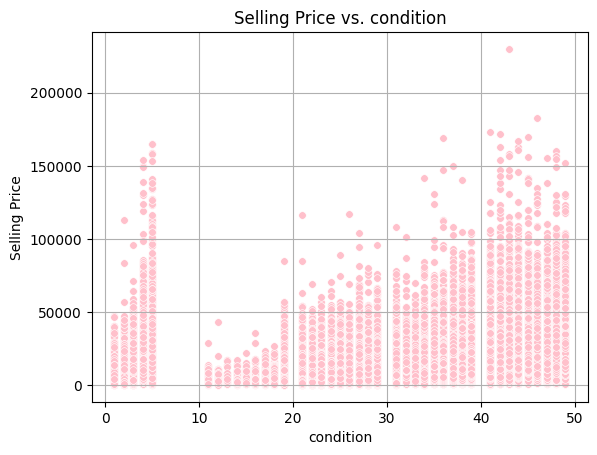

In [34]:
sns.scatterplot(data, x="odometer", y="sellingprice", color="#358D0C", s=30)
plt.xlabel("Odometer (km)")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Odometer Reading")
plt.grid(True)

plt.show()

sns.scatterplot(data, x="mmr", y="sellingprice", color="#0B8FB9", s=30)
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. MMR")
plt.grid(True)

plt.show()


sns.scatterplot(data, x="condition", y="sellingprice", color="pink", s=30)
plt.xlabel("condition")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. condition")
plt.grid(True)

plt.show()

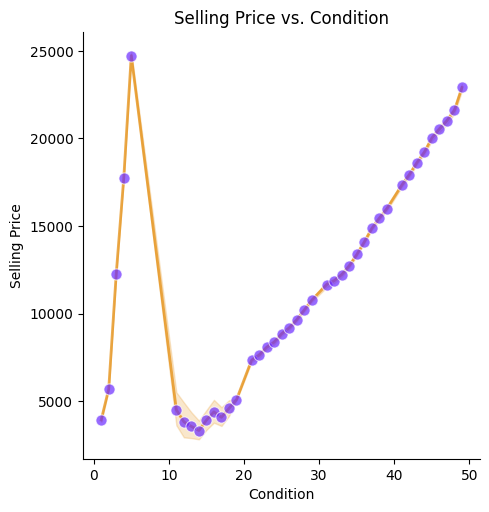

In [35]:
sns.relplot(
    x="condition",
    y="sellingprice",
    color="#E38804",
    kind="line",
    data=data,
    linewidth=2,
    marker="o",
    markersize=8,
    alpha=0.7,
    dashes=False,
    legend="full",
    markerfacecolor="#6B2BFF",
)


plt.xlabel("Condition")
plt.ylabel("Selling Price")
plt.title("Selling Price vs. Condition")


plt.show()

Выведем тепловую карту пропущенных значений

<Axes: >

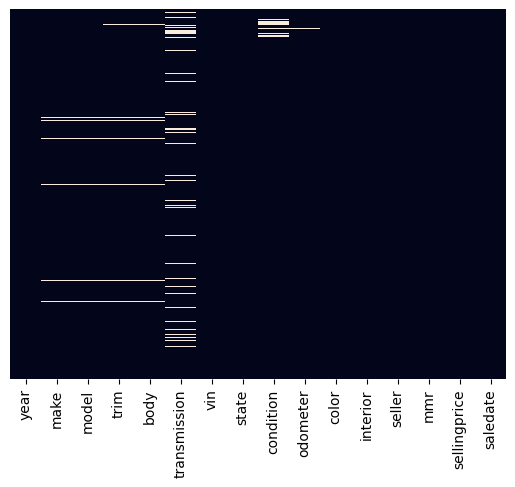

In [36]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

Видим, что некоторые пропущенные значения содержатся в нескольких столбцах, значит, что у одного и того же наблюдения отсутствует значение нескольких атрибутов

In [37]:
undef = data.isnull().sum(axis=1)
undef[undef >= 2]

44        2
493       4
742       4
747       4
766       4
         ..
558545    4
558617    4
558736    4
558773    4
558776    4
Length: 13859, dtype: int64

In [38]:
data = data.drop(undef[undef >= 2].index, axis=0)

<Axes: >

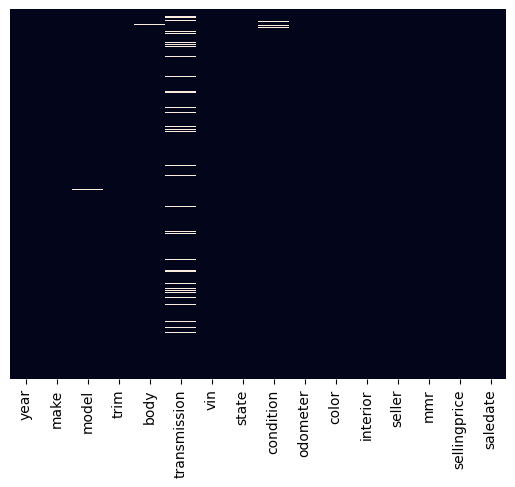

In [39]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544952 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544952 non-null  int64  
 1   make          544952 non-null  object 
 2   model         544864 non-null  object 
 3   trim          544952 non-null  object 
 4   body          543125 non-null  object 
 5   transmission  483629 non-null  object 
 6   vin           544952 non-null  object 
 7   state         544952 non-null  object 
 8   condition     535584 non-null  float64
 9   odometer      544931 non-null  float64
 10  color         544952 non-null  object 
 11  interior      544952 non-null  object 
 12  seller        544952 non-null  object 
 13  mmr           544952 non-null  float64
 14  sellingprice  544952 non-null  float64
 15  saledate      544952 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 70.7+ MB


In [41]:
data.isnull().sum()

year                0
make                0
model              88
trim                0
body             1827
transmission    61323
vin                 0
state               0
condition        9368
odometer           21
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Предположим, что сезон продажи влиет на стоимость

In [42]:
data = data[data['model'].isna() == False]

In [43]:
data['month'] = data['saledate'].astype(str).apply(lambda x: x[4:7])

In [44]:
data['month'].value_counts()

month
Feb    158887
Jan    138238
Jun     97868
May     51228
Dec     50816
Mar     45147
Apr      1402
Jul      1278
Name: count, dtype: int64

In [45]:
# Создание словаря с соответствием месяцев к сезонам
seasons = {
'Jan': 'Winter',
'Feb': 'Winter',
'Mar': 'Spring',
'Apr': 'Spring',
'May': 'Spring',
'Jun': 'Summer',
'Jul': 'Summer',
'Aug': 'Summer',
'Sep': 'Fall',
'Oct': 'Fall',
'Nov': 'Fall',
'Dec': 'Winter'
}

# Добавление столбца с сезонами
data['Season'] = data['month'].map(seasons)

data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,month,Season
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,Winter
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Dec,Winter
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Jan,Winter
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Jan,Winter
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Dec,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,kia,k900,luxury,sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),Jul,Summer
558833,2012,ram,2500,power wagon,crew cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,Summer
558834,2012,bmw,x5,xdrive35d,suv,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Jul,Summer
558835,2015,nissan,altima,2.5 s,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),Jul,Summer


In [46]:
data = data[data['odometer'].isna() == False]

In [47]:
data = data[data['body'].isna() == False]

In [48]:
data.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission    61323
vin                 0
state               0
condition        9368
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
month               0
Season              0
dtype: int64

В столбце состояния множество пропущенных значений, целесобразно заполнить случайными значениями с сохранением текущего распределения данного признака

In [49]:
filler = data.condition[data.condition.isna()]

In [50]:
filler = data.condition[~data.condition.isna()].sample(n=len(filler)).set_axis(filler.index)

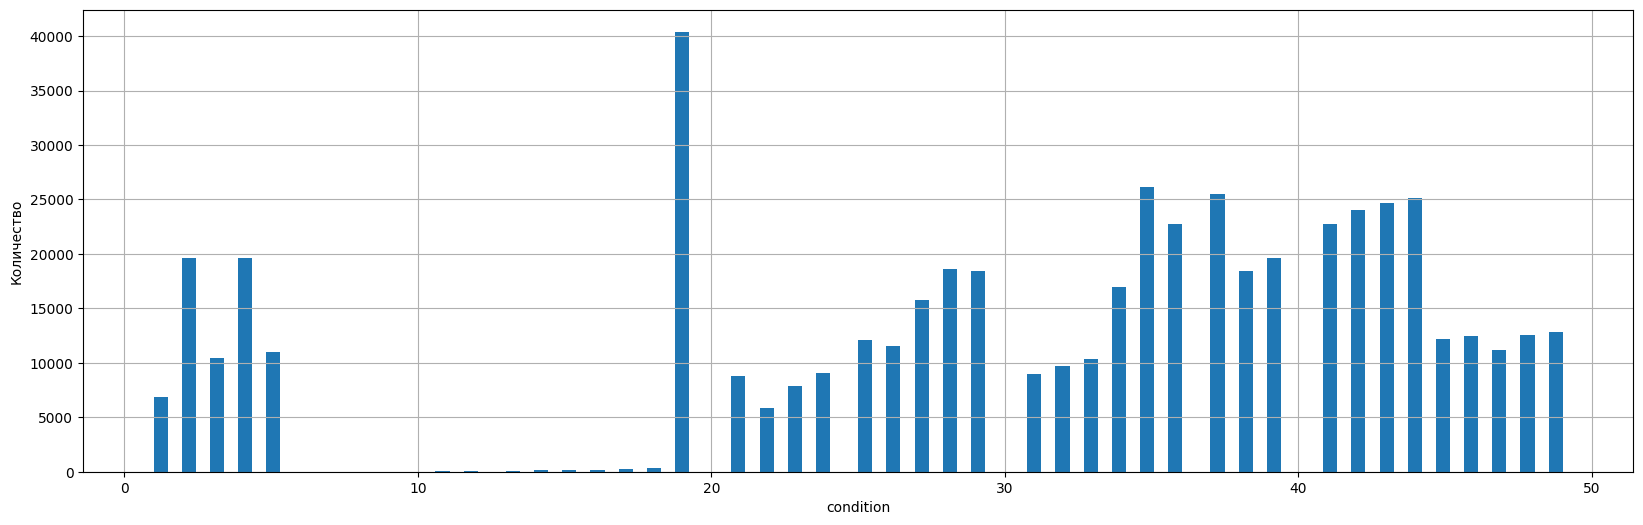

In [51]:
custom_hist(data['condition'], 'condition',  bins = 100)


In [52]:
data.condition = data.condition.fillna(filler)

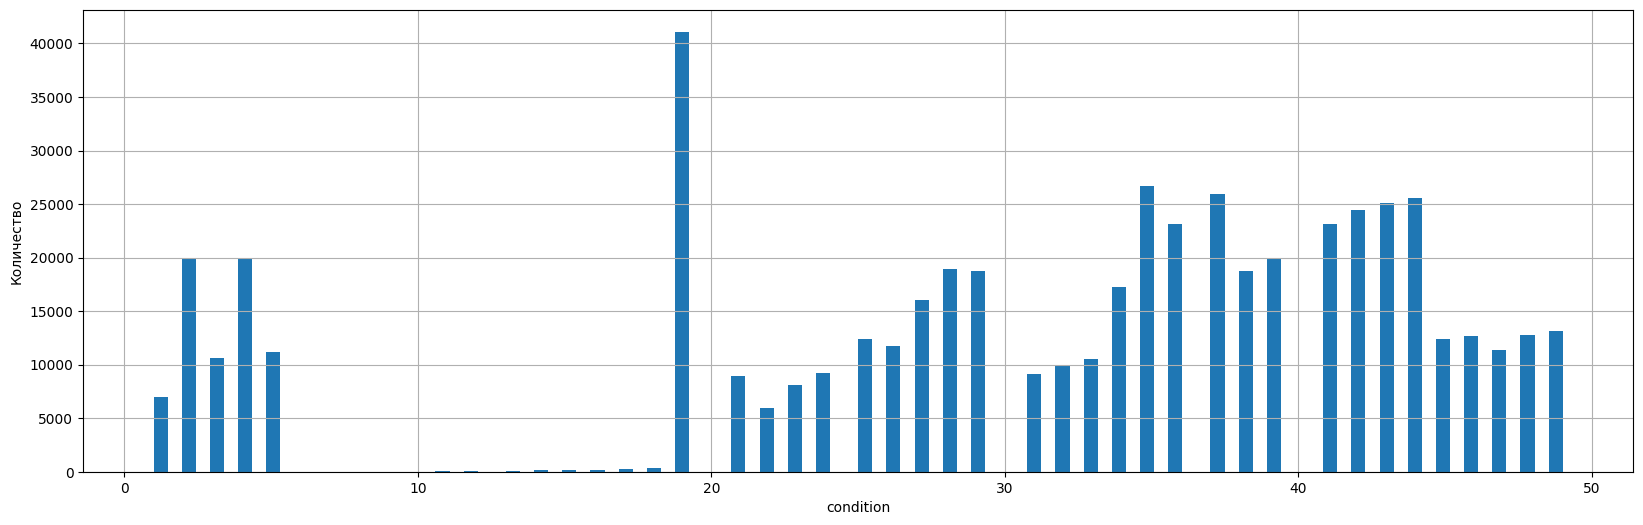

In [53]:
custom_hist(data['condition'], 'condition',  bins = 100)

In [54]:
data.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission    61323
vin                 0
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
month               0
Season              0
dtype: int64

Вывыдем распредление целевой переменной и атрибутов: среденее значение цены, приходящееся на признак с указанием дисперсии

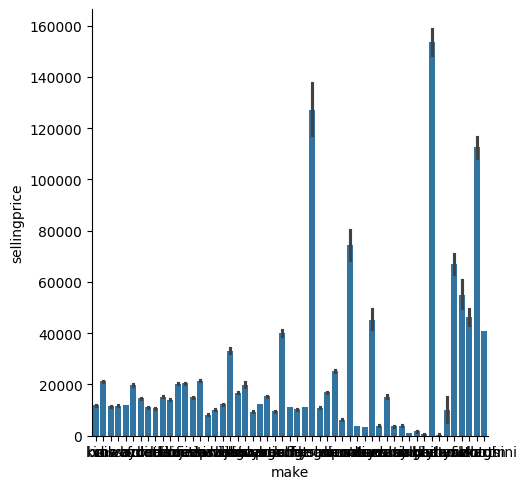

In [46]:
sns.catplot(data=data, x="make", y="sellingprice", kind="bar")

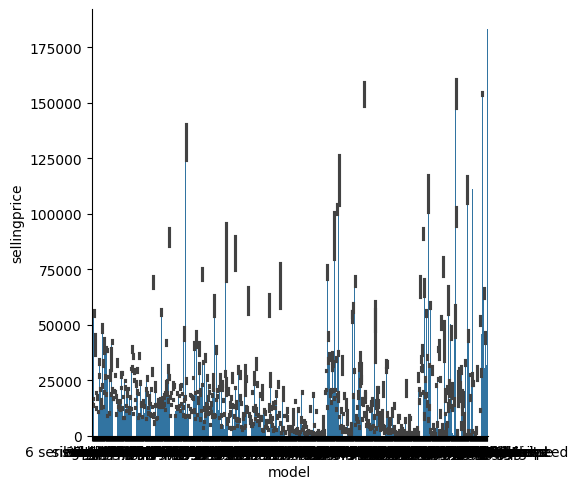

In [116]:
sns.catplot(data=data, x="model", y="sellingprice", kind="bar")

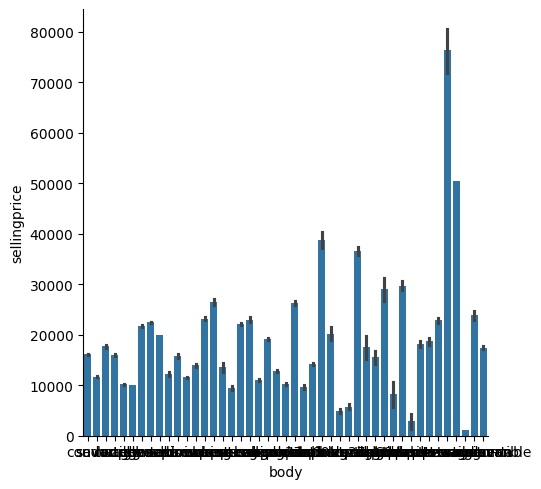

In [118]:
sns.catplot(data=data, x="body", y="sellingprice", kind="bar")

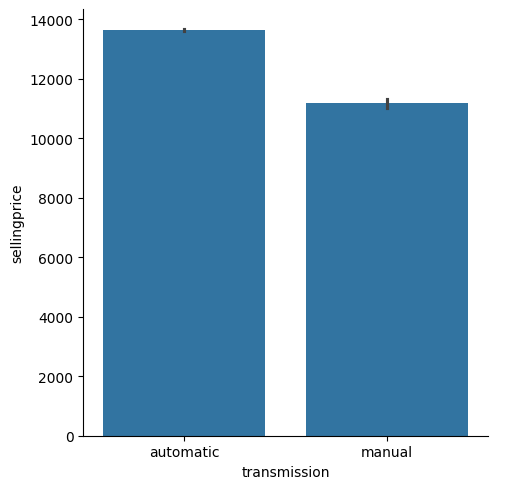

In [119]:
sns.catplot(data=data, x="transmission", y="sellingprice", kind="bar")

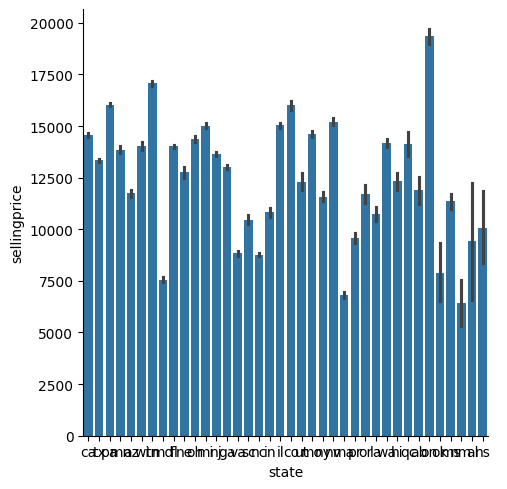

In [120]:
sns.catplot(data=data, x="state", y="sellingprice", kind="bar")

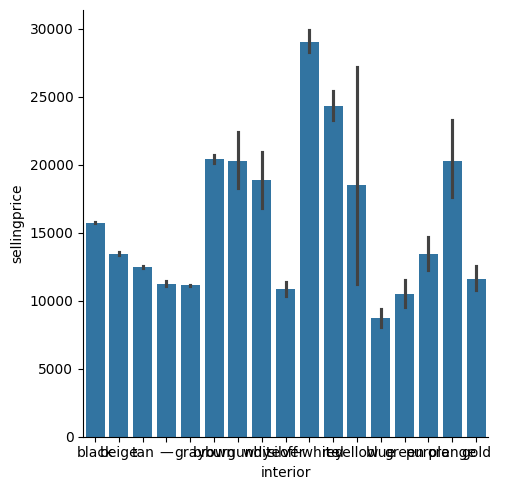

In [121]:
sns.catplot(data=data, x="interior", y="sellingprice", kind="bar")

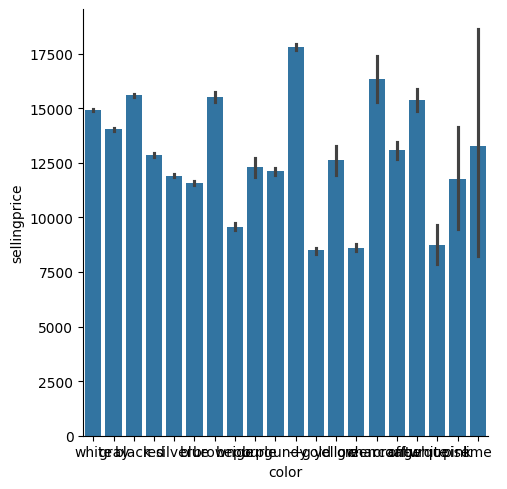

In [122]:
sns.catplot(data=data, x="color", y="sellingprice", kind="bar")

Удалим некоторые пропущенные значений, их процент от общей выборки очень мало и удаление не уменьшит презентабельность выборки

In [55]:
data['transmission'].mode().values[0]

'automatic'

In [56]:
data['transmission'] = data['transmission'].fillna(data['transmission'].mode().values[0])

In [57]:
data['transmission'].value_counts()

transmission
automatic    526186
manual        16830
Name: count, dtype: int64

Выполним преобразование категориальной переменной, содержащей 2 значения, в бинарную

In [58]:
from sklearn.preprocessing import LabelEncoder
LE_transmission = LabelEncoder()
data.transmission = LE_transmission.fit_transform(data.transmission)

Теперь выведем тепловую карту корреляции, чтобы оценить влияние признаков на целевую переменную

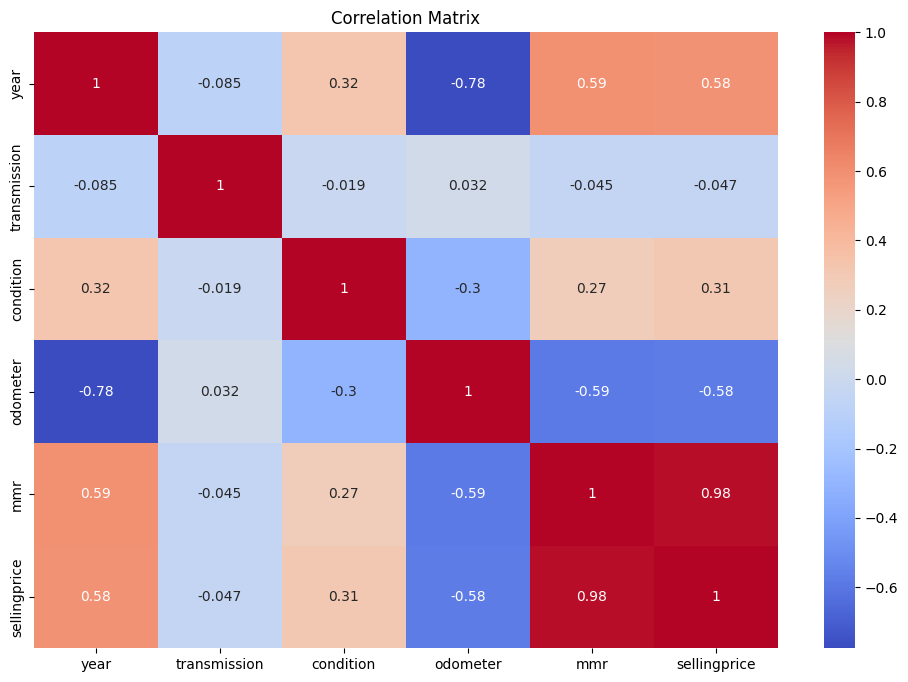

In [59]:
correlation_matrix = data.corr(numeric_only= True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543016 entries, 0 to 558836
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          543016 non-null  int64  
 1   make          543016 non-null  object 
 2   model         543016 non-null  object 
 3   trim          543016 non-null  object 
 4   body          543016 non-null  object 
 5   transmission  543016 non-null  int64  
 6   vin           543016 non-null  object 
 7   state         543016 non-null  object 
 8   condition     543016 non-null  float64
 9   odometer      543016 non-null  float64
 10  color         543016 non-null  object 
 11  interior      543016 non-null  object 
 12  seller        543016 non-null  object 
 13  mmr           543016 non-null  float64
 14  sellingprice  543016 non-null  float64
 15  saledate      543016 non-null  object 
 16  month         543016 non-null  object 
 17  Season        543016 non-null  object 
dtypes: float6

In [61]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'month', 'Season'],
      dtype='object')

Удалим признаки, обозначающие уникальный номер, преобразованные столбцы, а также те, которые с точки зрения экономической интерпретации не влияют на целевую переменную

In [62]:
data_ready = data.drop(['trim', 'vin', 'interior', 'seller', 'mmr','state', 'color', 'model',
              'saledate', 'month'], axis =1)

In [63]:

data_ready

,year,make,body,transmission,condition,odometer,sellingprice,Season
0,2015,kia,suv,0,5.0,16639.0,21500.0,Winter
1,2015,kia,suv,0,5.0,9393.0,21500.0,Winter
2,2014,bmw,sedan,0,45.0,1331.0,30000.0,Winter
3,2015,volvo,sedan,0,41.0,14282.0,27750.0,Winter
4,2014,bmw,sedan,0,43.0,2641.0,67000.0,Winter
...,...,...,...,...,...,...,...,...
558832,2015,kia,sedan,0,45.0,18255.0,33000.0,Summer
558833,2012,ram,crew cab,0,5.0,54393.0,30800.0,Summer
558834,2012,bmw,suv,0,48.0,50561.0,34000.0,Summer
558835,2015,nissan,sedan,0,38.0,16658.0,11100.0,Summer


Выполним преобразование номинальных признаков - преобразуем категориальные переменные с помощью OneHotEncoder

In [64]:
data_dummies = pd.get_dummies(data_ready)

In [65]:
data_dummies = data_dummies.astype(int)

In [63]:
data_dummies

,year,transmission,condition,odometer,sellingprice,make_acura,make_aston martin,make_audi,make_bentley,make_bmw,...,body_supercrew,body_suv,body_transit van,body_tsx sport wagon,body_van,body_wagon,body_xtracab,Season_Spring,Season_Summer,Season_Winter
0,2015,0,5,16639,21500,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2015,0,5,9393,21500,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2014,0,45,1331,30000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,2015,0,41,14282,27750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,0,43,2641,67000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,0,45,18255,33000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
558833,2012,0,5,54393,30800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
558834,2012,0,48,50561,34000,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
558835,2015,0,38,16658,11100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Мы получили готовый для моделирования датасет

Выделим экзогенные переменные, а также эндогенную, затем разделим выборку на обучающую и тестовую

In [66]:
X = data_dummies.drop(['sellingprice'], axis = 1)
y = data_dummies['sellingprice']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для начала построим модель Нейросетевой регрессии

In [79]:
# Создаем последовательную модель
start_time = time.time()
# Создание модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(105,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Линейная активация в последнем слое

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели
loss, mae = model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Mean Absolute Error: {mae}')

# Пример использования обученной модели для предсказания
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

Epoch 1/10
13576/13576 [==============================] - 45s 3ms/step - loss: 58676040.0000 - mae: 5241.2900 - val_loss: 53086812.0000 - val_mae: 4837.9277
Epoch 2/10
13576/13576 [==============================] - 36s 3ms/step - loss: 50221132.0000 - mae: 4766.9482 - val_loss: 41409784.0000 - val_mae: 4257.1362
Epoch 3/10
13576/13576 [==============================] - 34s 3ms/step - loss: 40384180.0000 - mae: 4156.1714 - val_loss: 36630060.0000 - val_mae: 3800.5144
Epoch 4/10
13576/13576 [==============================] - 35s 3ms/step - loss: 37093388.0000 - mae: 3963.1433 - val_loss: 33572328.0000 - val_mae: 3611.0537
Epoch 5/10
13576/13576 [==============================] - 37s 3ms/step - loss: 35470092.0000 - mae: 3875.8159 - val_loss: 31797292.0000 - val_mae: 3786.4734
Epoch 6/10
13576/13576 [==============================] - 40s 3ms/step - loss: 34565104.0000 - mae: 3827.2737 - val_loss: 40886328.0000 - val_mae: 4957.1738
Epoch 7/10
13576/13576 [==============================] - 

In [80]:
print(execution_time, mse)

404.94560527801514 30593055.96620467


In [81]:
results = []

In [82]:
results.append({
        'Model': 'Neural network regression',
        'MSE': mse,
        'Execution Time': execution_time
    })

Затем обучим модели : ElasticNet , Ridge, Lasso, DecisionTreeRegressor,RandomForestRegressor. Заполняя при этом таблицу со временем и точностью


In [83]:

# Модели регрессии
models = {
    'ElasticNet': ElasticNetCV(),
    'Ridge': RidgeCV(),
    'Lasso': LassoCV(),
    'DecisionTree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    end_time = time.time()
    execution_time = end_time - start_time

    results.append({
        'Model': name,
        'MSE': mse,
        'Accuracy': accuracy,
        'Execution Time': execution_time
    })

# Создание таблицы с результатами
results_df = pd.DataFrame(results)
print(results_df)

                       Model           MSE  Execution Time   Accuracy
0  Neural network regression  3.059306e+07      404.945605        NaN
1                 ElasticNet  6.141065e+07       14.310040   0.337150
2                      Ridge  1.444585e+09       12.750215 -14.592456
3                      Lasso  6.141066e+07       14.209282   0.337150
4               DecisionTree  3.008353e+07       10.701646   0.675287
5              Random Forest  1.710315e+07      746.996344   0.815393


Лучшей моделью будет являться Random Forest - самое высокое значение Accuracy, а также низкое значение для MSE. Однако данная модель требует больше времени для обучения. Ridge регрессия совершенно не подходит для данной задачи

In [69]:
X, X_test, y, Y_test = train_test_split(X, y, test_size=0.2)
X_train, X_cv, Y_train,Y_cv = train_test_split(X, y, test_size = 0.25)

Посмотрим, можно ли оптимизировать параметры при ограниченных возможностях обучения

In [67]:
rf = RandomForestRegressor()

In [72]:
# Определение сетки параметров для GridSearch
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 2],
    'min_samples_split': [2, 5]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Запуск поиска по сетке
grid_search.fit(X_cv, Y_cv)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Лучшая оценка: 0.7956229471449778


Мы оптимизировали параметр 'min_samples_split': 5

Теперь оценим точность получившейся модели на всем наборе данных

In [89]:
X = data_dummies.drop(['sellingprice'], axis = 1).values
y = data_dummies['sellingprice'].values

In [90]:
y

array([21500, 21500, 30000, ..., 34000, 11100, 26700])

In [91]:
kf = KFold(n_splits= 3, shuffle= True, random_state= 15)

In [95]:
accuracy_m = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model = RandomForestRegressor(min_samples_split = 5)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  y_pred = np.argmax(pred)
  accuracy_m.append(model.score(X_test, y_test))

In [96]:
print("Среднее по кросс-валидации: ", np.array(accuracy_m).mean())

Среднее по кросс-валидации:  0.8176720833023815


Получилось довольно высокое значение метрики